In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

In [54]:
from msr.data.download.mimic import load_mimic_raw_tensors_for_split, FS
from msr.data.measurements import MimicMeasurement

data, targets = load_mimic_raw_tensors_for_split("val", "sbp_dbp_avg")
data, targets = data.numpy(), targets.numpy()
sample = data[777]
ppg, ecg = sample.T
measurement = MimicMeasurement(ppg, ecg, FS)
measurement.set_beats(source_channel='ecg', align_peaks_loc=True)
# measurement.set_windows(13, 11)
measurement.set_agg_beat()
ppg_sig = measurement['ppg']

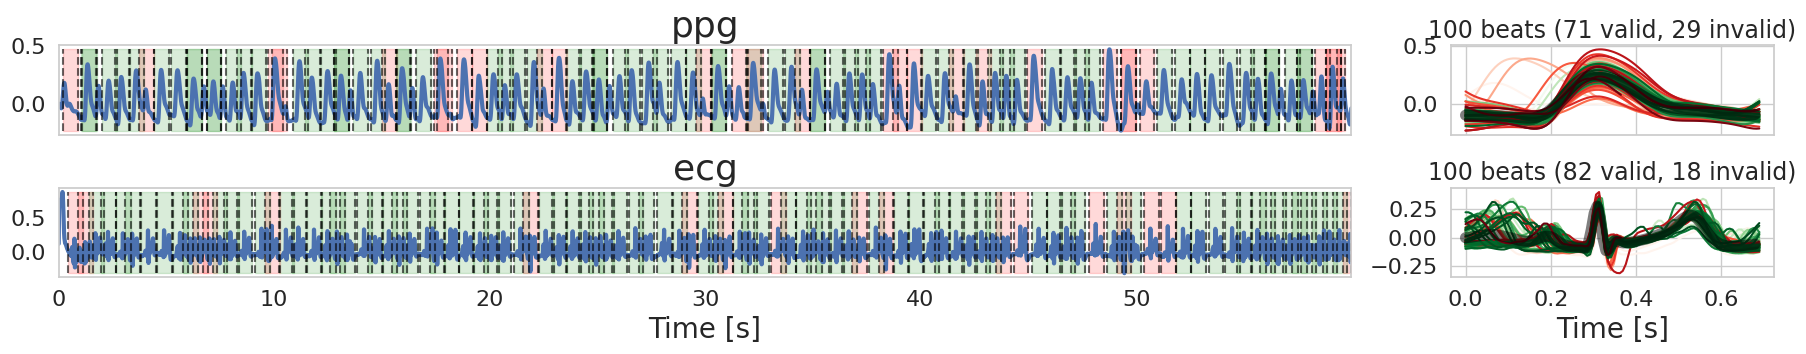

In [55]:
fig =  measurement.plot_beats_segmentation()

In [17]:
sig = measurement['ecg']

beats_to_aggregate_mask = sig.valid_beats_mask if False else len(sig.beats) * [True]
if beats_to_aggregate_mask is None:
    beats_to_aggregate_mask = len(sig.beats) * [True]
beats_to_aggregate = sig.beats[beats_to_aggregate_mask]
beats_data = np.array([beat.data for beat in beats_to_aggregate])
beats_times = np.array([beat.time for beat in beats_to_aggregate])
agg_beat_data, agg_beat_time = beats_data.mean(axis=0), beats_times.mean(axis=0)
agg_fs = len(agg_beat_data) / (agg_beat_time[-1] - agg_beat_time[0])

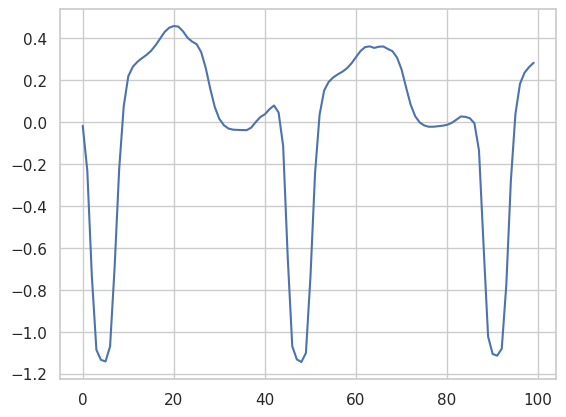

In [19]:
plt.plot(agg_beat_data)

In [39]:
from funcs import get_figs_for_thesis_periodic, plot_zoomed_samples

prefix = "ppg_"
figs = get_figs_for_thesis_periodic(ppg_sig, prefix)

for name, fig in figs.items():
    fig.savefig(f"plots/{name}.pdf", bbox_inches="tight")

In [6]:
wsw = ppg_sig.get_whole_signal_waveform()
wsf = ppg_sig.extract_features()
abw = ppg_sig.get_agg_beat_waveform()
abf = ppg_sig.get_agg_beat_features()

wsw.shape, wsf.shape, abw.shape, abf.shape

((7500,), (329,), (100,), (44,))

In [43]:
fig = plot_zoomed_samples(ppg_sig)

In [45]:
fig.savefig(f"plots/waveform_example.pdf", bbox_inches="tight")

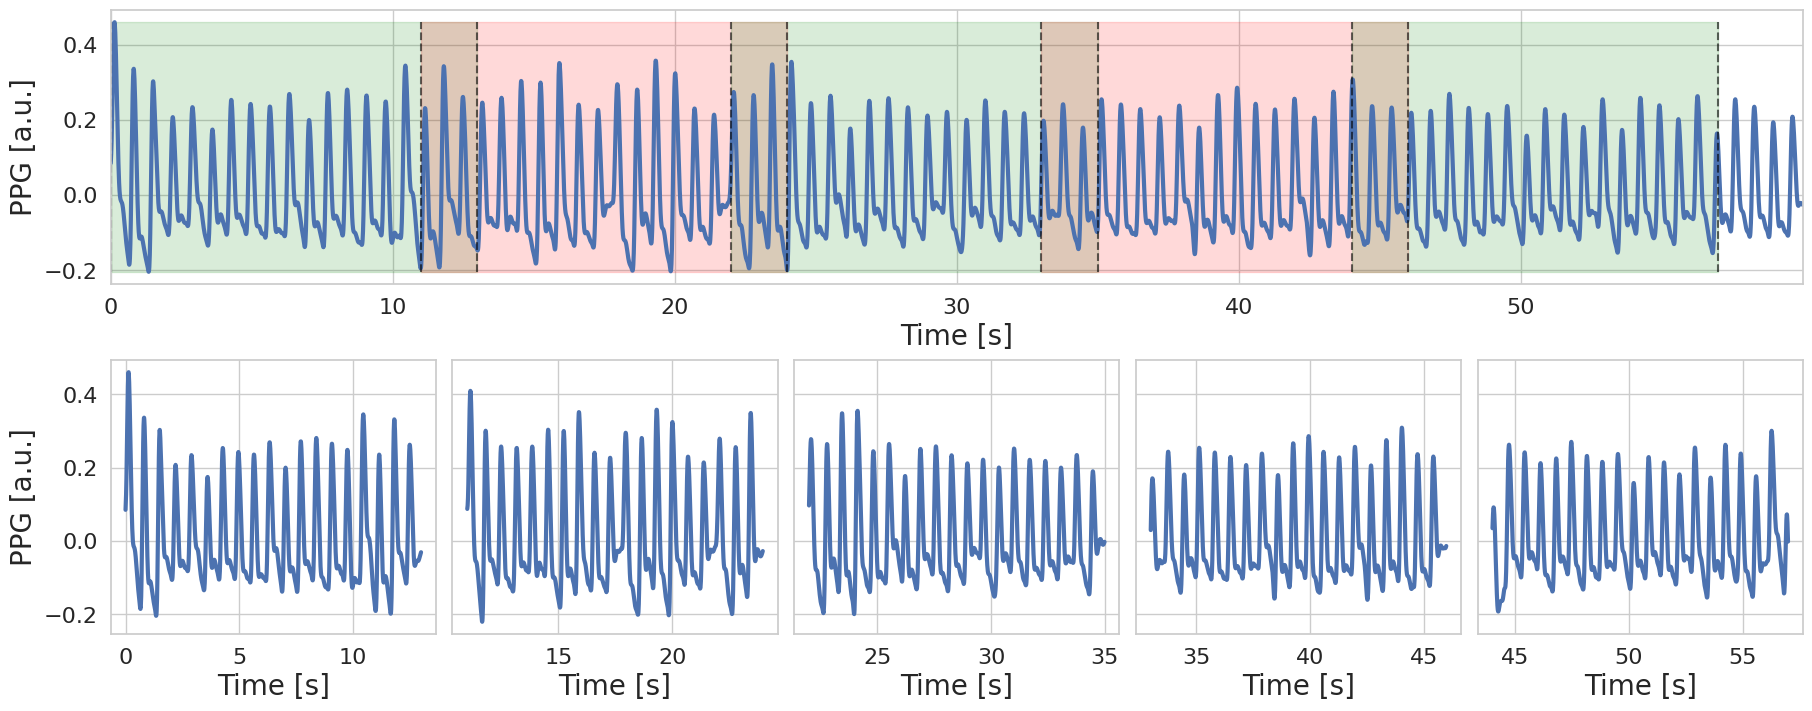

In [69]:
sig = ppg_sig.get_slice(0, 60)
sig.set_beats()
sig.set_windows(13, 11)
fig = sig.plot_segmentation(mode="windows")
fig.savefig(f"plots/windows_waveform_example.pdf", bbox_inches="tight")